In [1]:
library("databaRd")
library("ggplot2")
library("dplyr")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [79]:
#cc <- 1

merge.vs <- function(v1, v2) {
    v.merge <- numeric()
    idx <- 1
    while (length(v1) > 0 | length(v2) > 0) {
        if (length(v1) == 0)      { v.merge[idx] <- v2[1]; v2 <- v2[-1] }
        else if (length(v2) == 0) { v.merge[idx] <- v1[1]; v1 <- v1[-1] }
        else if (v1[1] < v2[1])   { v.merge[idx] <- v1[1]; v1 <- v1[-1] } 
        else                      { v.merge[idx] <- v2[1]; v2 <- v2[-1] }
        idx <- idx + 1
    }
    return(v.merge)
}

merge.sort <- function(v) {
    #cc <<- cc + 1
    n <- length(v)
    if(n == 1) return(v)
    sorted <- merge.vs(merge.sort(v[1:floor(n/2)]), merge.sort(v[(floor(n/2)+1):n]))
    return(sorted)
}

v1 <- sample(1:30)
v1
merge.sort(v1)

[1] 19  3  6 27 18 30 12 24  9 15 22 21  1 10 25 13  8 17 26 14 23  7 11 20  2
[26] 28 16  5  4 29

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30

In [7]:
all <- c()
merge.ranges <- function(r1, r2, ...) {
    merged <- numeric()
    if (save.dir != "") plot.vector(all, dir = save.dir, m = merged, v1 = r1, v2 = r2)
    while (length(r1) > 0 | length(r2) > 0) {
        if (length(r1) == 0)              { merged <- c(merged, r2[1]); r2 <- r2[-1] }
        else if (length(r2) == 0)         { merged <- c(merged, r1[1]); r1 <- r1[-1] }
        else if (all[r1[1]] < all[r2[1]]) { merged <- c(merged, r1[1]); r1 <- r1[-1] }
        else { 
            t <- all[r2[1]] 
            all[r1 + 1] <<- all[r1]
            all[r1[1]] <<- t
            merged <- c(merged, r1[1])
            r1 <- r1 + 1
            r2 <- r2[-1]
        }
        if (save.dir != "") plot.vector(all, dir = save.dir, m = merged, v1 = r1, v2 = r2, ...)
    }
    return(merged)
}

recurse.merge.sort <- function(range = 1:length(all), ...) {
    n <- length(range)
    if(n == 1) return(range) 
    sorted <- merge.ranges(recurse.merge.sort(range[1:floor(n/2)], ...), recurse.merge.sort(range[(floor(n/2)+1):n]), ...)
    return(sorted)
}
    
merge.sort <- function(v, dir="", ...) {
    all <<- v
    save.dir <<- dir
    
    x <- recurse.merge.sort(...)
    return(all)
}

In [75]:
set.seed(98765)
data <- sample(1:4)
data %>% head(2)

[1] 4 1

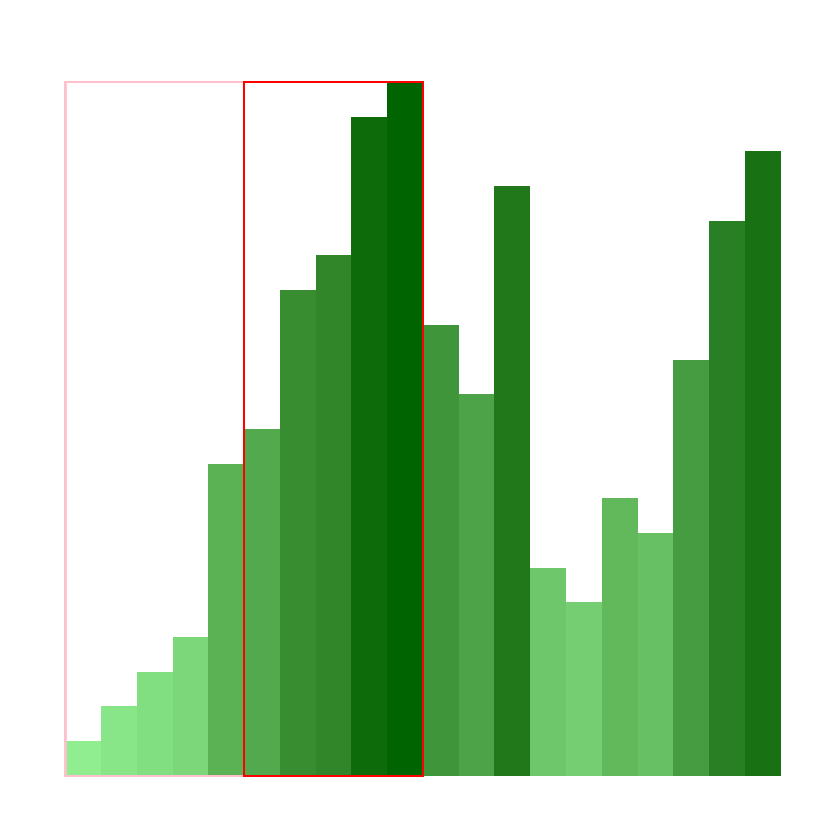

In [5]:
plot.vector <- function(v, dir = "", col.low = "gray50", col.high = "gray50", color.only = F,
                        m = numeric(), v1 = numeric(), v2 = numeric()) {
    data <- data.frame(rank = 1:length(v), value = v)
    g <- ggplot(data, aes(x = rank, y = value, fill = value)) +
        geom_col(width=1) +
        scale_fill_gradient(low = col.low, high = col.high) +
        guides(fill=F) +
        theme_databard() +
        theme(
            text = element_blank(),
            axis.line = element_blank(), 
            axis.ticks = element_blank(),
            panel.background = element_blank(),
            panel.border = element_blank(),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            plot.background = element_blank()
        )
    
    if (length(m) > 0) g <- g + geom_rect(xmin = min(m) - 0.5, xmax = max(m) + 0.5, ymin = 0, ymax = max(v), 
                                          alpha=0, color="blue")
    if (length(v1) > 0) g <- g + geom_rect(xmin = min(v1) - 0.5, xmax = max(v1) + 0.5, ymin = 0, ymax = max(v), 
                                          alpha=0, color="pink")
    if (length(v2) > 0) g <- g + geom_rect(xmin = min(v2) - 0.5, xmax = max(v2) + 0.5, ymin = 0, ymax = max(v), 
                                          alpha=0, color="red")
    
    if (color.only) g <- g + geom_col(aes(y = max(v)), width=1)
        
    if (dir != "") {
        fs <- list.files(dir)
        tag <- 1
        if (length(fs) > 0) tag <- max(as.numeric(lapply(sapply(fs, function(x) strsplit(x, "\\.")), '[[', 1))) + 1
        fname <- paste(dir, "/", tag, ".sortplot.png", sep='')
        ggsave(file = fname, g, dpi = 100)
    }
    g
}
v <- sample(1:20)
v <- c(merge.sort(v[1:5]), merge.sort(v[6:10]), v[11:20])
plot.vector(v, col.low="light green", col.high="dark green", color.only=F, v1 = 1:5, v2 = 6:10)

In [9]:
v <- rev(1:8)
dir <- "figures/Merge1/"
v
merge.sort(v, dir, col.low="light green", col.high="dark green")


[1] 8 7 6 5 4 3 2 1

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


[1] 1 2 3 4 5 6 7 8